In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
from scipy import stats
import warnings

In [51]:
from wordcloud import WordCloud

In [52]:
import os
warnings.filterwarnings('ignore')

# Data Udemy

In [53]:
url = "https://drive.google.com/file/d/10NJWDYdJY9hgSIfkUACjUCMz6NuncLxR/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_udemy_eda = pd.read_csv(url)

In [54]:
df_udemy_eda.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8


In [55]:
df_udemy_eda["Fecha"] = df_udemy_eda['published_timestamp'].apply(lambda x: x[:10])

In [56]:
df_udemy_eda['Fecha'] = pd.to_datetime(df_udemy_eda['Fecha'])

In [57]:
print(df_udemy_eda['Fecha'])

0      2017-01-18
1      2017-03-09
2      2016-12-19
3      2017-05-30
4      2016-12-13
          ...    
3673   2016-06-14
3674   2017-03-10
3675   2015-12-30
3676   2016-08-11
3677   2014-09-28
Name: Fecha, Length: 3678, dtype: datetime64[ns]


In [58]:
df_udemy_eda['Fecha'].dt.year

0       2017
1       2017
2       2016
3       2017
4       2016
        ... 
3673    2016
3674    2017
3675    2015
3676    2016
3677    2014
Name: Fecha, Length: 3678, dtype: int64

In [59]:
df_udemy_eda['language']= df_udemy_eda['language'].replace(['NoData'],'English')

In [60]:
df_udemy_eda['language']= df_udemy_eda['language'].replace(['Spanish'],'Español')

In [61]:
df_udemy_eda['language'].value_counts()

English       3483
Español         76
Português       39
日本語             28
Deutsch         17
Français        10
Arabic           9
Türkçe           4
русский          3
Italiano         3
Portuguese       2
简体中文             1
Hindi            1
한국어              1
Urdu             1
Name: language, dtype: int64

In [62]:
df_udemy_eda['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [63]:
df_udemy_eda['Fecha'] = pd.to_datetime(df_udemy_eda['published_timestamp'].str[:10], format='%Y-%m-%d')

In [64]:
df_udemy_eda['Fecha'].head

<bound method NDFrame.head of 0      2017-01-18
1      2017-03-09
2      2016-12-19
3      2017-05-30
4      2016-12-13
          ...    
3673   2016-06-14
3674   2017-03-10
3675   2015-12-30
3676   2016-08-11
3677   2014-09-28
Name: Fecha, Length: 3678, dtype: datetime64[ns]>

In [65]:
df_udemy_eda = df_udemy_eda.drop(['url'], axis=1)

In [66]:
df_udemy_eda.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'language', 'rating', 'Fecha'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

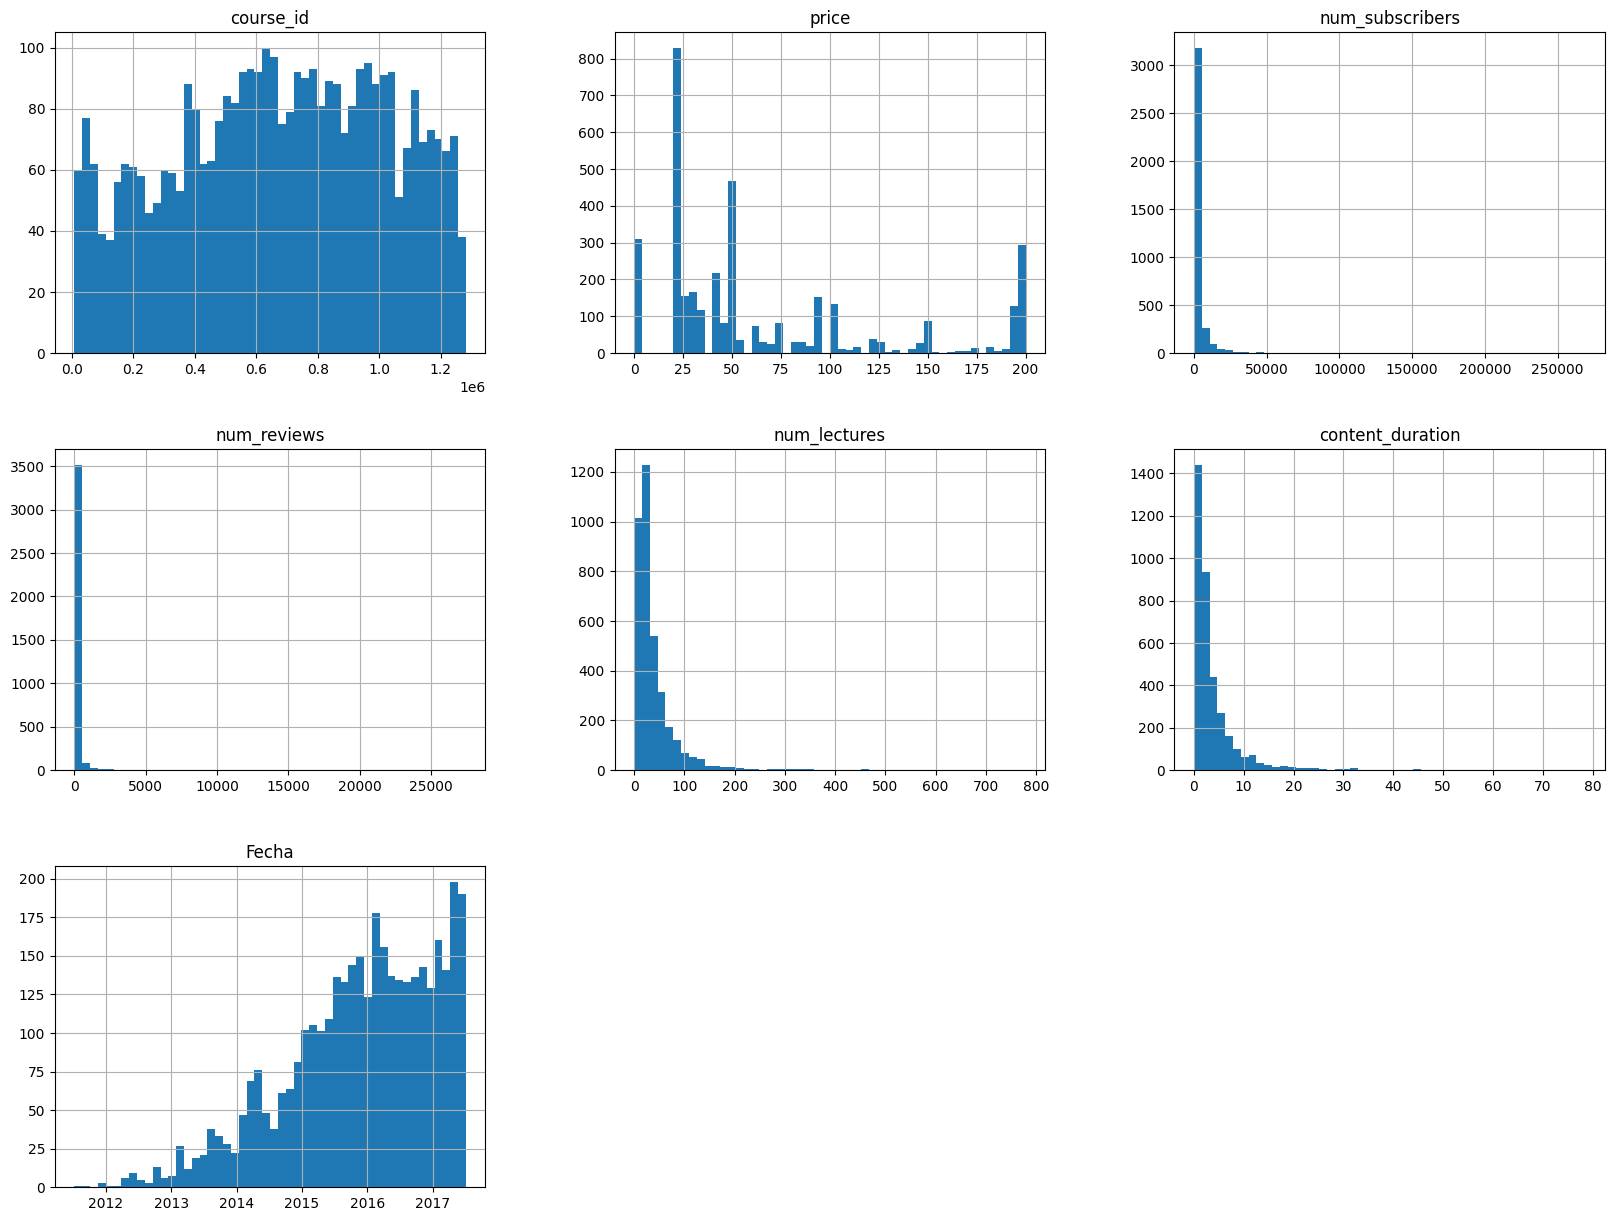

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
df_udemy_eda.hist(bins = 50, figsize = (20,15))
plt.show

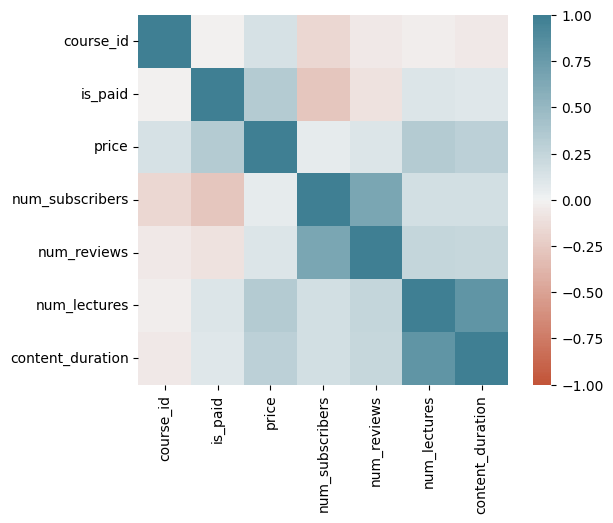

In [68]:
corr_matrix = df_udemy_eda.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

array([[<Axes: xlabel='num_subscribers', ylabel='num_subscribers'>,
        <Axes: xlabel='price', ylabel='num_subscribers'>],
       [<Axes: xlabel='num_subscribers', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

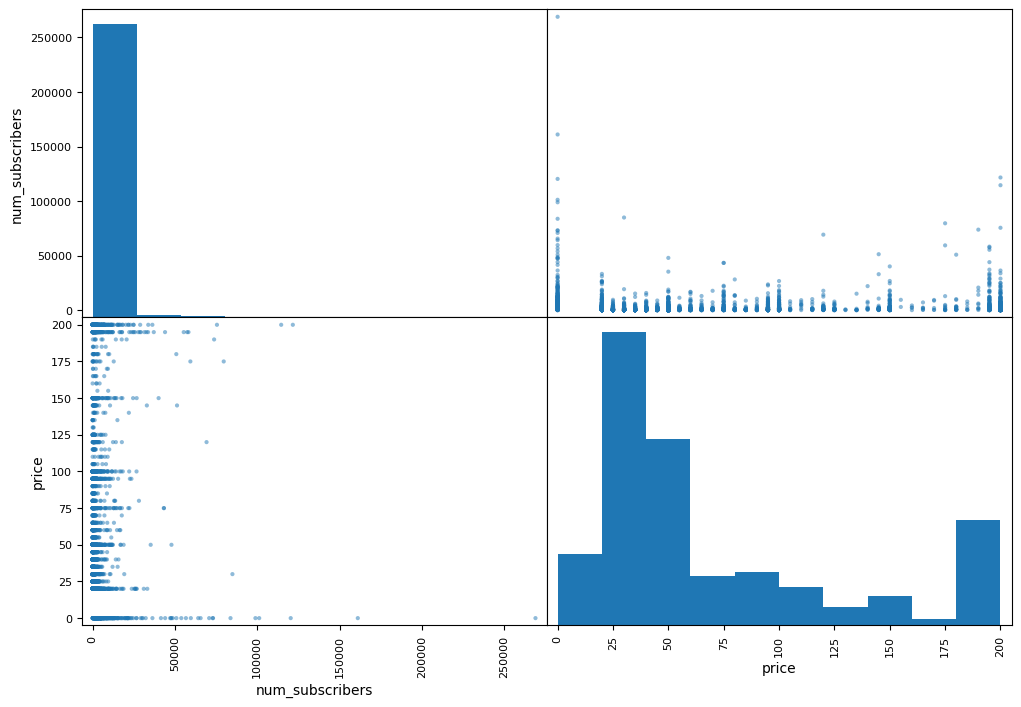

In [70]:
from pandas.plotting import scatter_matrix

attributes = ["num_subscribers", "price"]
scatter_matrix(df_udemy_eda[attributes], figsize = (12,8))

# Wordcloud

()

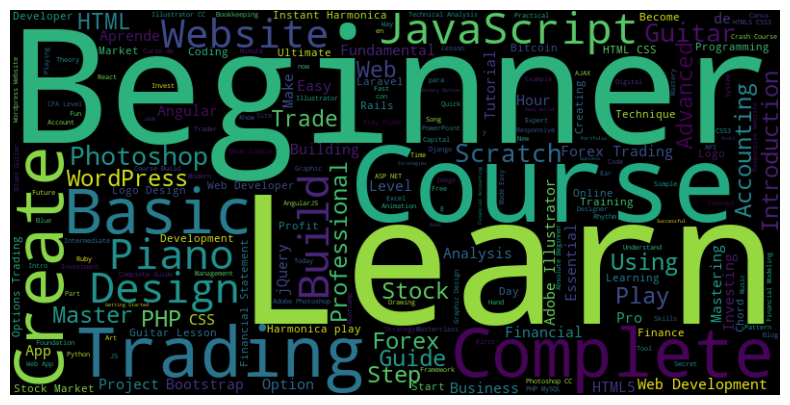

In [71]:
titles = ' '.join(df_udemy_eda['course_title'])

# Creando wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)

# Showing the wordcloud of course titles
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show
() 

# Creando el Csv el para POWERBI

In [72]:
df_udemy_eda.to_csv('udemy_df_eda.csv',index=False)